In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob
import time

In [2]:
# !pip install keras-utils

In [3]:
import tensorflow as tf
import keras_utils
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split

In [4]:
images_files = [f for f in glob.glob('/home/students/savemula/Intelligent_systems/data_cap/**/*', recursive= True) if not os.path.isdir(f)]
random.shuffle(images_files)

In [5]:
data = []
labels = []
for img in images_files:
    image = cv2.imread(img)
    image = cv2.resize(image, (220,220))
    image = img_to_array(image)
    data.append(image)
    
    #labels creation
    label = img.split(os.path.sep)[-2]
    if label == 'with':
        label = 1
    else:
        label = 0
    labels.append([label]) # created a list of list of labels used for later

In [6]:
#converting into arrays
data = np.array(data)/255.0
labels = np.array(labels)

#splitting the data set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=40)

In [7]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [8]:
#augmenting the dataset as the data is very low

aug_data = ImageDataGenerator(rotation_range = 25, width_shift_range = 0.1,
                             height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [9]:
leb = to_categorical(labels, num_classes=2)
y_train[0]

array([0., 1.], dtype=float32)

In [10]:
np.__version__

'1.18.5'

## Model 3

In [13]:
try:  
    with tf.device('/device:GPU:5'):
        def build_3(width, height, depth, classes):
            #width is an width of image
            #depth is channels of an image
            model = Sequential()
            inputShape = (height, width, depth)
            
            model.add(Conv2D(200, (3,3), padding="same", input_shape=inputShape))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Conv2D(100,(3,3)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())
            model.add(Dropout(0.5))
            model.add(Dense(50,activation='relu'))
            model.add(Dense(2,activation='softmax'))

            return model
except RuntimeError as e:
    print(e)

In [16]:
start = time.time()
batch_size = 1
epochs = 60
lr =1e-3
checkpoint = ModelCheckpoint('models/model3-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
try:  
    with tf.device('/device:GPU:5'):
        model3 = build_3(width=220, height=220, depth=3,classes=2)
        # compile the model
        opt = RMSprop()
        model3.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

        # train the model
        H3 = model3.fit(aug_data.flow(X_train, y_train), 
                                validation_data=(X_test,y_test),
                                epochs=epochs,callbacks=[checkpoint], verbose=1)
except RuntimeError as e:
    print(e)
end = time.time()
print("time taken for execution :- {}".format(end-start))

Epoch 1/60
8/8 [==============================] - 5s 665ms/step - loss: 1.7113 - accuracy: 0.4980 - val_loss: 0.6904 - val_accuracy: 0.5484
Epoch 2/60
8/8 [==============================] - 4s 506ms/step - loss: 0.6890 - accuracy: 0.5429 - val_loss: 0.6715 - val_accuracy: 0.6129
Epoch 3/60
8/8 [==============================] - 4s 473ms/step - loss: 0.6846 - accuracy: 0.5918 - val_loss: 0.6636 - val_accuracy: 0.6613
Epoch 4/60
8/8 [==============================] - 4s 482ms/step - loss: 0.6767 - accuracy: 0.5755 - val_loss: 0.6519 - val_accuracy: 0.6129
Epoch 5/60
8/8 [==============================] - 4s 516ms/step - loss: 0.6586 - accuracy: 0.6816 - val_loss: 0.6380 - val_accuracy: 0.6452
Epoch 6/60
8/8 [==============================] - 4s 455ms/step - loss: 0.6118 - accuracy: 0.6735 - val_loss: 0.6900 - val_accuracy: 0.5968
Epoch 7/60
8/8 [==============================] - 3s 429ms/step - loss: 0.6076 - accuracy: 0.6776 - val_loss: 0.6524 - val_accuracy: 0.5323
Epoch 8/60
8/8 [====

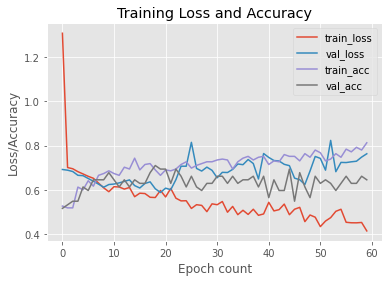

In [15]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H3.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H3.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H3.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H3.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch count")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')

## Testing on Images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cvlib as cv
import tensorflow as tf
from tensorflow.keras.models import load_model
# from google.colab import  files
# from google.colab.patches import cv2_imshow

In [2]:
cap_model = load_model('models/model3-020.hy')
cap_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 200)     5600      
_________________________________________________________________
activation (Activation)      (None, 220, 220, 200)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 200)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 100)     180100    
_________________________________________________________________
activation_1 (Activation)    (None, 108, 108, 100)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 291600)            0

## For blurring the face

In [3]:
def detect_blur_face_image(img):
    cap_dict ={0:'No Cap',1:'Has Cap'}
    h, w = img.shape[:2]
    # gaussian blur kernel size depends on width and height of original image
    kernel_width = (w // 7) | 1
    kernel_height = (h // 7) | 1
    faces, confidences = cv.detect_face(img) 
    for index,face in enumerate(faces):
        x1,y1 = face[0],face[1]
        x2,y2 = face[2],face[3]
        print(img.shape)
        image = img[y1-200:y2,x1-100:x2+40]
        image_blur = img[y1:y2-(y2-y1)//2,x1:x2]
        blur = cv2.GaussianBlur(image_blur, (kernel_width, kernel_height), 0)
        resize_img = cv2.resize(image, (220,220))
        
        norm_img = resize_img/255.0
        reshaped=np.reshape(norm_img,(1,220,220,3))
        try:  
            with tf.device('/device:CPU:0'):
                cap_pred = cap_dict[np.argmax(cap_model.predict(reshaped))]

        except RuntimeError as e:
            print(e)
        if(cap_pred == cap_dict[1]):
            img[y1:y2-(y2-y1)//2,x1:x2] = blur
        print(cap_pred)
        cv2.putText(img, cap_pred, (x1, y1-10),cv2.FONT_HERSHEY_SIMPLEX,4,(255,255,255),15)
    return img

(2656, 3984, 3)
Has Cap


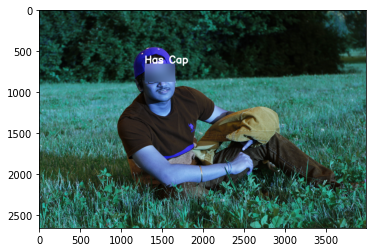

In [4]:
image = cv2.imread("temp1.JPG")
out_image = detect_blur_face_image(image)

plt.imshow(out_image)
# plt.savefig('out1.png')

(184, 274, 3)
Has Cap


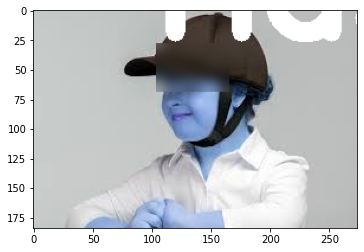

In [5]:
image = cv2.imread("test2.JPG")
out_image = detect_blur_face_image(image)

plt.imshow(out_image)
plt.savefig('out1.png')

(2880, 1920, 3)
No Cap


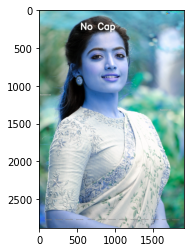

In [6]:
image = cv2.imread("female.JPG")
out_image = detect_blur_face_image(image)

plt.imshow(out_image)
# plt.savefig('out1.png')

(181, 279, 3)
Has Cap


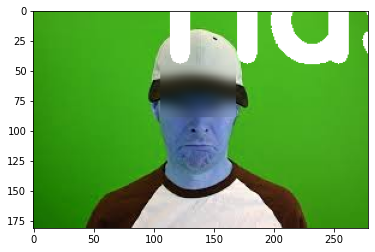

In [7]:
image = cv2.imread("test3.jpg")
out_image = detect_blur_face_image(image)

plt.imshow(out_image)
# plt.savefig('out1.png')

(1250, 1000, 3)
Has Cap


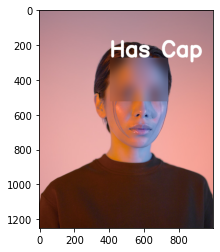

In [8]:
image = cv2.imread("test4.jpg")
out_image = detect_blur_face_image(image)

plt.imshow(out_image)
# plt.savefig('out1.png')